## **Diving into the Data**🤿

* The dataset consists of 30000 audio samples of spoken digits (0-9) of 60 folders and 500 files each.

* There is one directory per speaker holding the audio recordings.

* Additionally "audioMNIST_meta.txt" provides meta information such as gender or age of each speaker.

## Importing Libraries🚀

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Let's read and check some of the audio samples🔎

In [ ]:
import librosa
import librosa.display as dsp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

def get_waveform(digit=0):
    sample = np.random.randint(1, 60)
    index = np.random.randint(1, 5)

    if sample < 10:
        file = f"../input/audio-mnist/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"../input/audio-mnist/data/{sample}/{digit}_{sample}_{index}.wav"

    data, sample_rate = librosa.load(file)
    plt.figure(figsize=(6, 3))
    dsp.waveshow(data, sr=sample_rate)
    plt.title(f"Waveform of Digit '{digit}'")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()
    return Audio(data=data, rate=sample_rate)

In [ ]:
def get_mfcc(digit=0):
    sample = np.random.randint(1, 60)
    index = np.random.randint(1, 5)
    if sample < 10:
        file = f"../input/audio-mnist/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"../input/audio-mnist/data/{sample}/{digit}_{sample}_{index}.wav"

    data, sample_rate = librosa.load(file)

    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(6, 3))
    dsp.specshow(mfccs, sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs of Digit '{digit}'")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()
    return Audio(data=data, rate=sample_rate)

In [ ]:
def get_spectrogram(digit=0):
    sample = np.random.randint(1, 60)
    index = np.random.randint(1, 5)

    if sample < 10:
        file = f"../input/audio-mnist/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"../input/audio-mnist/data/{sample}/{digit}_{sample}_{index}.wav"

    data, sample_rate = librosa.load(file)
    plt.figure(figsize=(6, 3))
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    dsp.specshow(spec, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram of Digit '{digit}'")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()
    return Audio(data=data, rate=sample_rate)

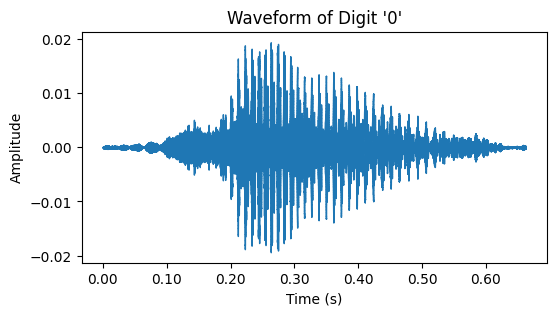

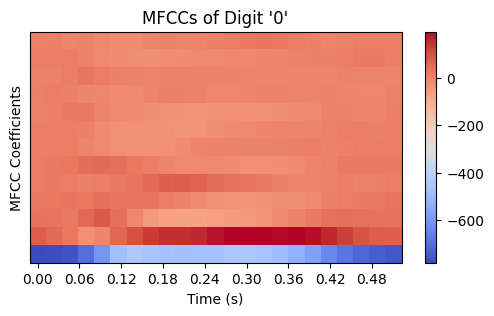

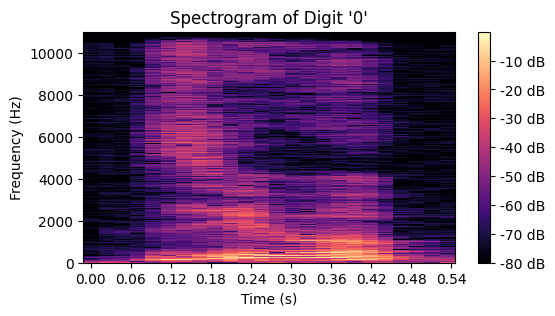

In [5]:
get_waveform(0)  
get_mfcc(0)  
get_spectrogram(0) 

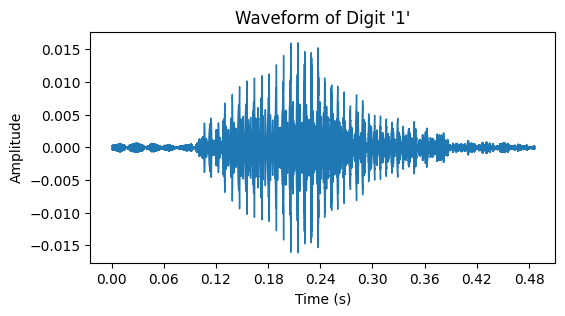

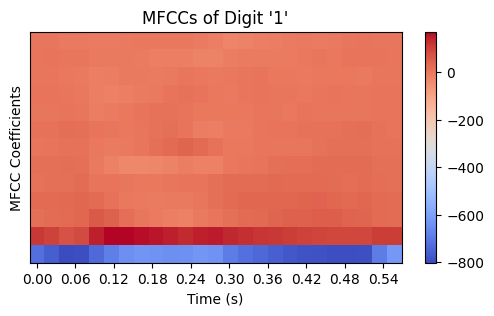

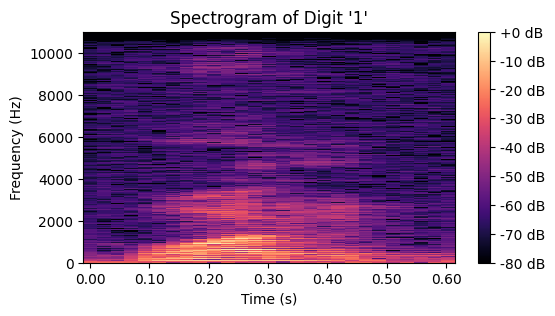

In [21]:
get_waveform(1)  
get_mfcc(1)  
get_spectrogram(1) 

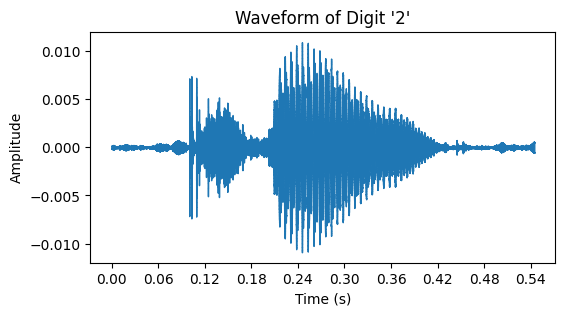

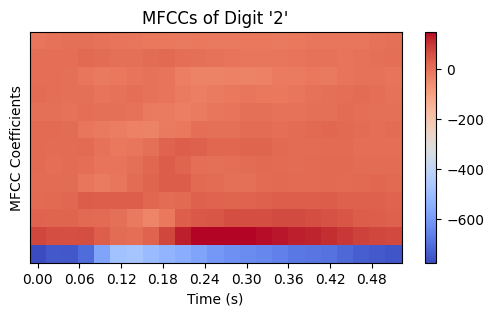

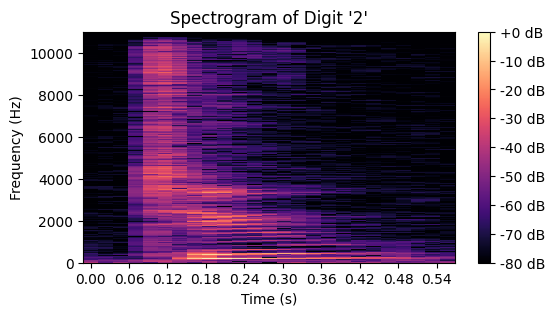

In [22]:
get_waveform(2)  
get_mfcc(2)  
get_spectrogram(2)

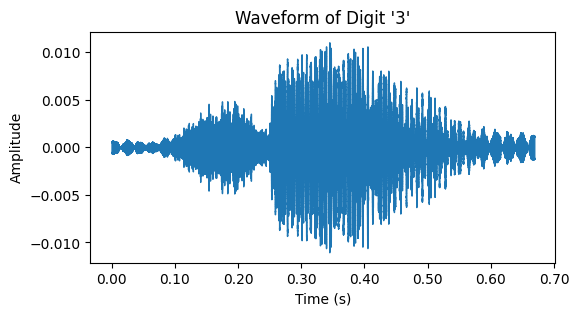

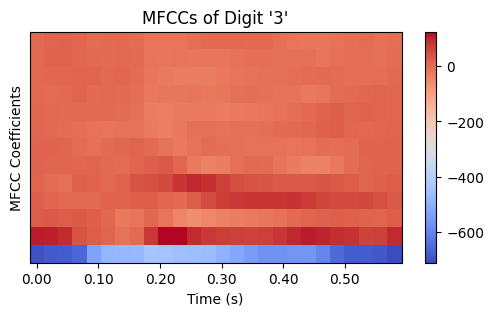

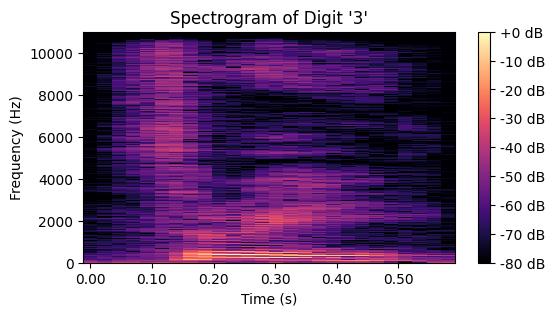

In [23]:
get_waveform(3)  
get_mfcc(3)  
get_spectrogram(3) 

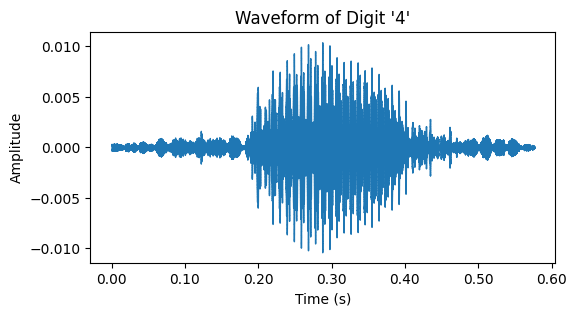

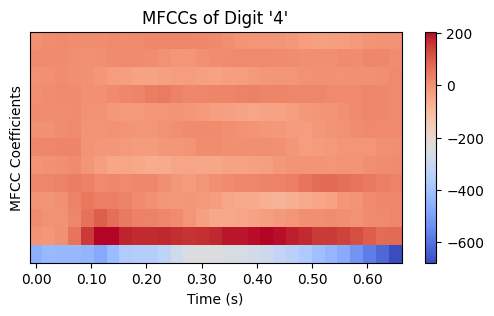

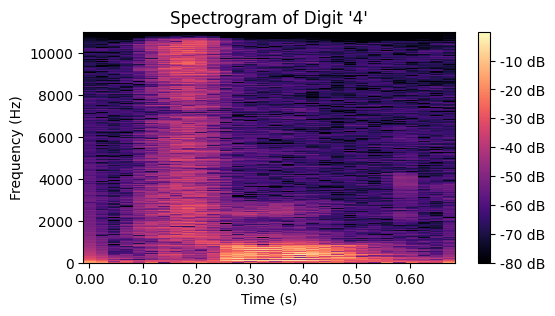

In [24]:
get_waveform(4)  
get_mfcc(4)  
get_spectrogram(4) 

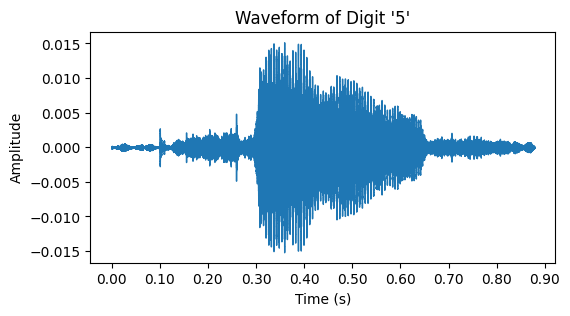

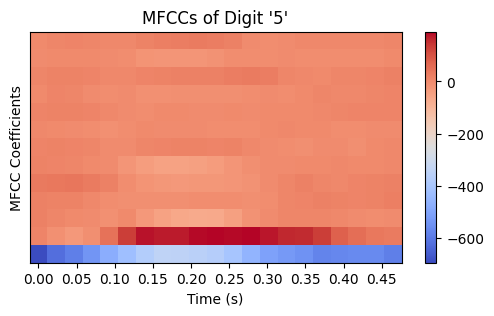

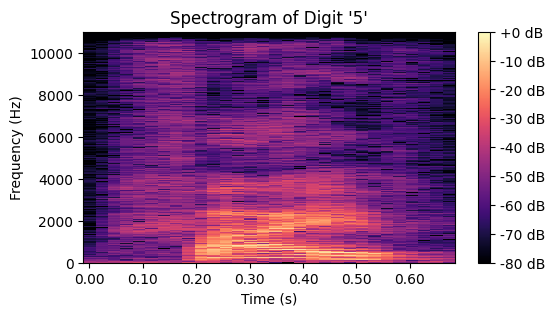

In [25]:
get_waveform(5)  
get_mfcc(5)  
get_spectrogram(5) 

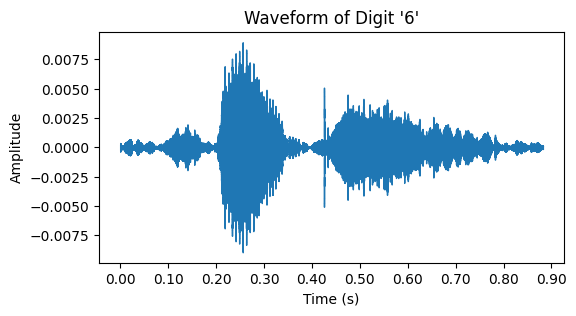

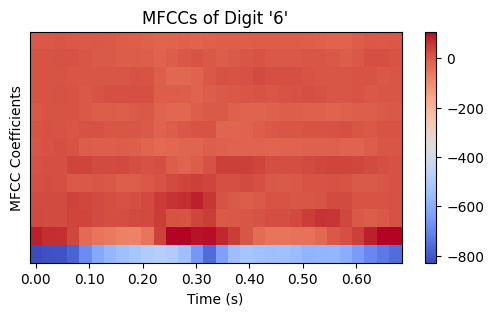

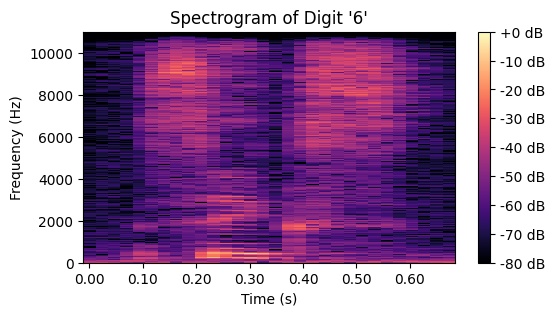

In [26]:
get_waveform(6)  
get_mfcc(6)  
get_spectrogram(6) 

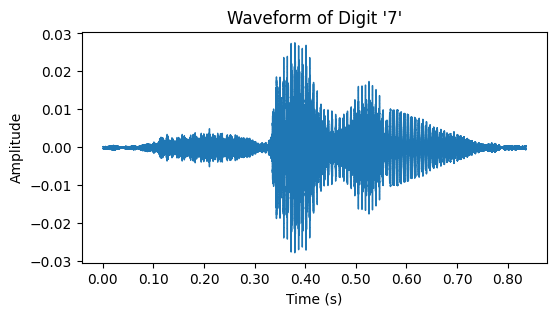

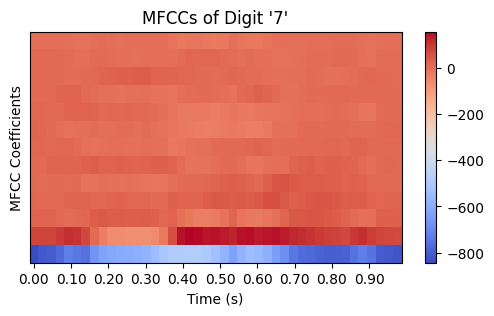

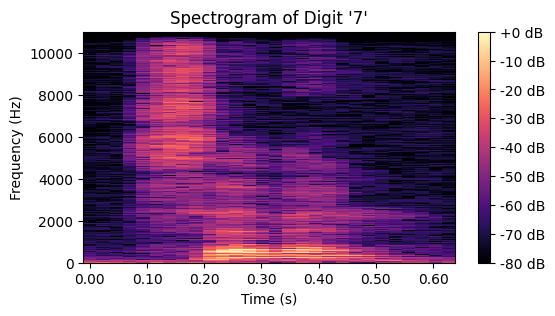

In [27]:
get_waveform(7)  
get_mfcc(7)  
get_spectrogram(7) 

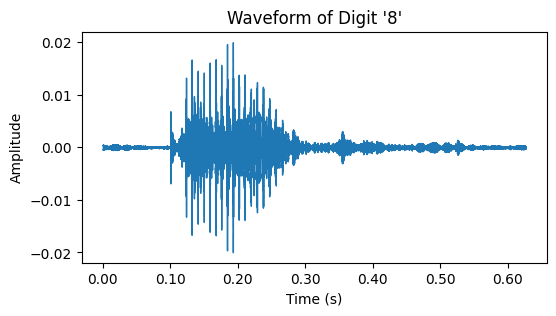

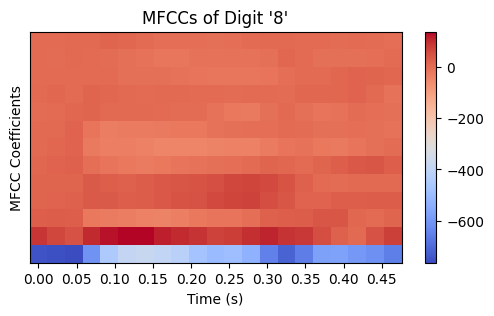

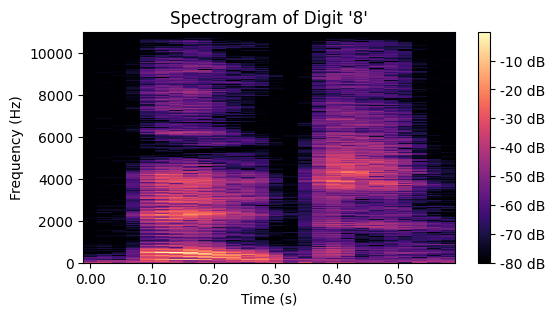

In [28]:
get_waveform(8)  
get_mfcc(8)  
get_spectrogram(8) 

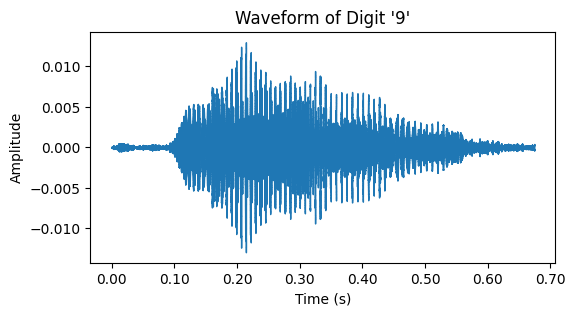

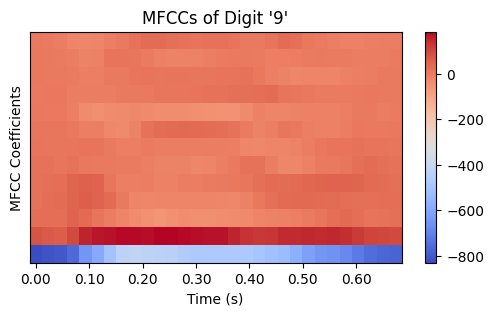

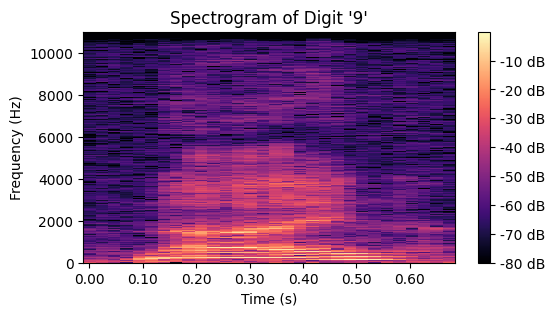

In [29]:
get_waveform(9)  
get_mfcc(9)  
get_spectrogram(9) 

## Extracting features from the audio file

#### Create a function that extracts the data from audio files

In [ ]:
import librosa
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

def extract_features_2d(file_path, n_mfcc=40, max_frames=130):
    """
    Extracts 2D MFCC features from an audio file, padded/truncated to a fixed number of frames.
    :param file_path: Path to the audio file.
    :param n_mfcc: Number of MFCC coefficients to extract. Default is 40.
    :param max_frames: The fixed number of time frames to pad/truncate the MFCC features to. Default is 130.
    """
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if mfccs.shape[1] < max_frames:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_frames]
    
    return mfccs

def preprocess_and_save_audio_mnist(n_mfcc=40, max_frames=130):
    """
    Extracts MFCC features from AudioMNIST and saves them to a .npz file.
    :param n_mfcc: Number of MFCC coefficients to extract. Default is 40.
    :param max_frames: The fixed number of time frames to pad/truncate the MFCC features to. Default is 130.
    """
    root_folder_path = "../input/audio-mnist/data/"
    X, y = [], []

    for folder in range(1, 61):
        folder_path = os.path.join(root_folder_path, f"{folder:02d}")
        print(f"Processing Folder {folder}...")
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                abs_file_path = os.path.join(folder_path, file)
                mfccs = extract_features_2d(abs_file_path, n_mfcc, max_frames)
                X.append(mfccs)
                y.append(int(file[0]))
        print(f"Folder {folder} processed.")

    X = np.array(X)
    y = np.array(y)
    np.savez(f"mfcc_{n_mfcc}_dataset.npz", X=X, y=y)
    print(f"Features extracted and saved to mfcc_{n_mfcc}_dataset.npz successfully!")
preprocess_and_save_audio_mnist()


Processing Folder 1...
Folder 1 processed.
Processing Folder 2...
Folder 2 processed.
Processing Folder 3...
Folder 3 processed.
Processing Folder 4...
Folder 4 processed.
Processing Folder 5...
Folder 5 processed.
Processing Folder 6...
Folder 6 processed.
Processing Folder 7...
Folder 7 processed.
Processing Folder 8...
Folder 8 processed.
Processing Folder 9...
Folder 9 processed.
Processing Folder 10...
Folder 10 processed.
Processing Folder 11...
Folder 11 processed.
Processing Folder 12...
Folder 12 processed.
Processing Folder 13...
Folder 13 processed.
Processing Folder 14...
Folder 14 processed.
Processing Folder 15...
Folder 15 processed.
Processing Folder 16...
Folder 16 processed.
Processing Folder 17...
Folder 17 processed.
Processing Folder 18...
Folder 18 processed.
Processing Folder 19...
Folder 19 processed.
Processing Folder 20...
Folder 20 processed.
Processing Folder 21...
Folder 21 processed.
Processing Folder 22...
Folder 22 processed.
Processing Folder 23...
Fold

In [ ]:
import numpy as np
data = np.load('/kaggle/working/mfcc_40_dataset.npz')
print("Keys in the .npz file:", data.files)
for key in data.files:
    print(f"{key} - shape: {data[key].shape}, dtype: {data[key].dtype}")


Keys in the .npz file: ['X', 'y']
X - shape: (30000, 40, 130), dtype: float32
y - shape: (30000,), dtype: int64


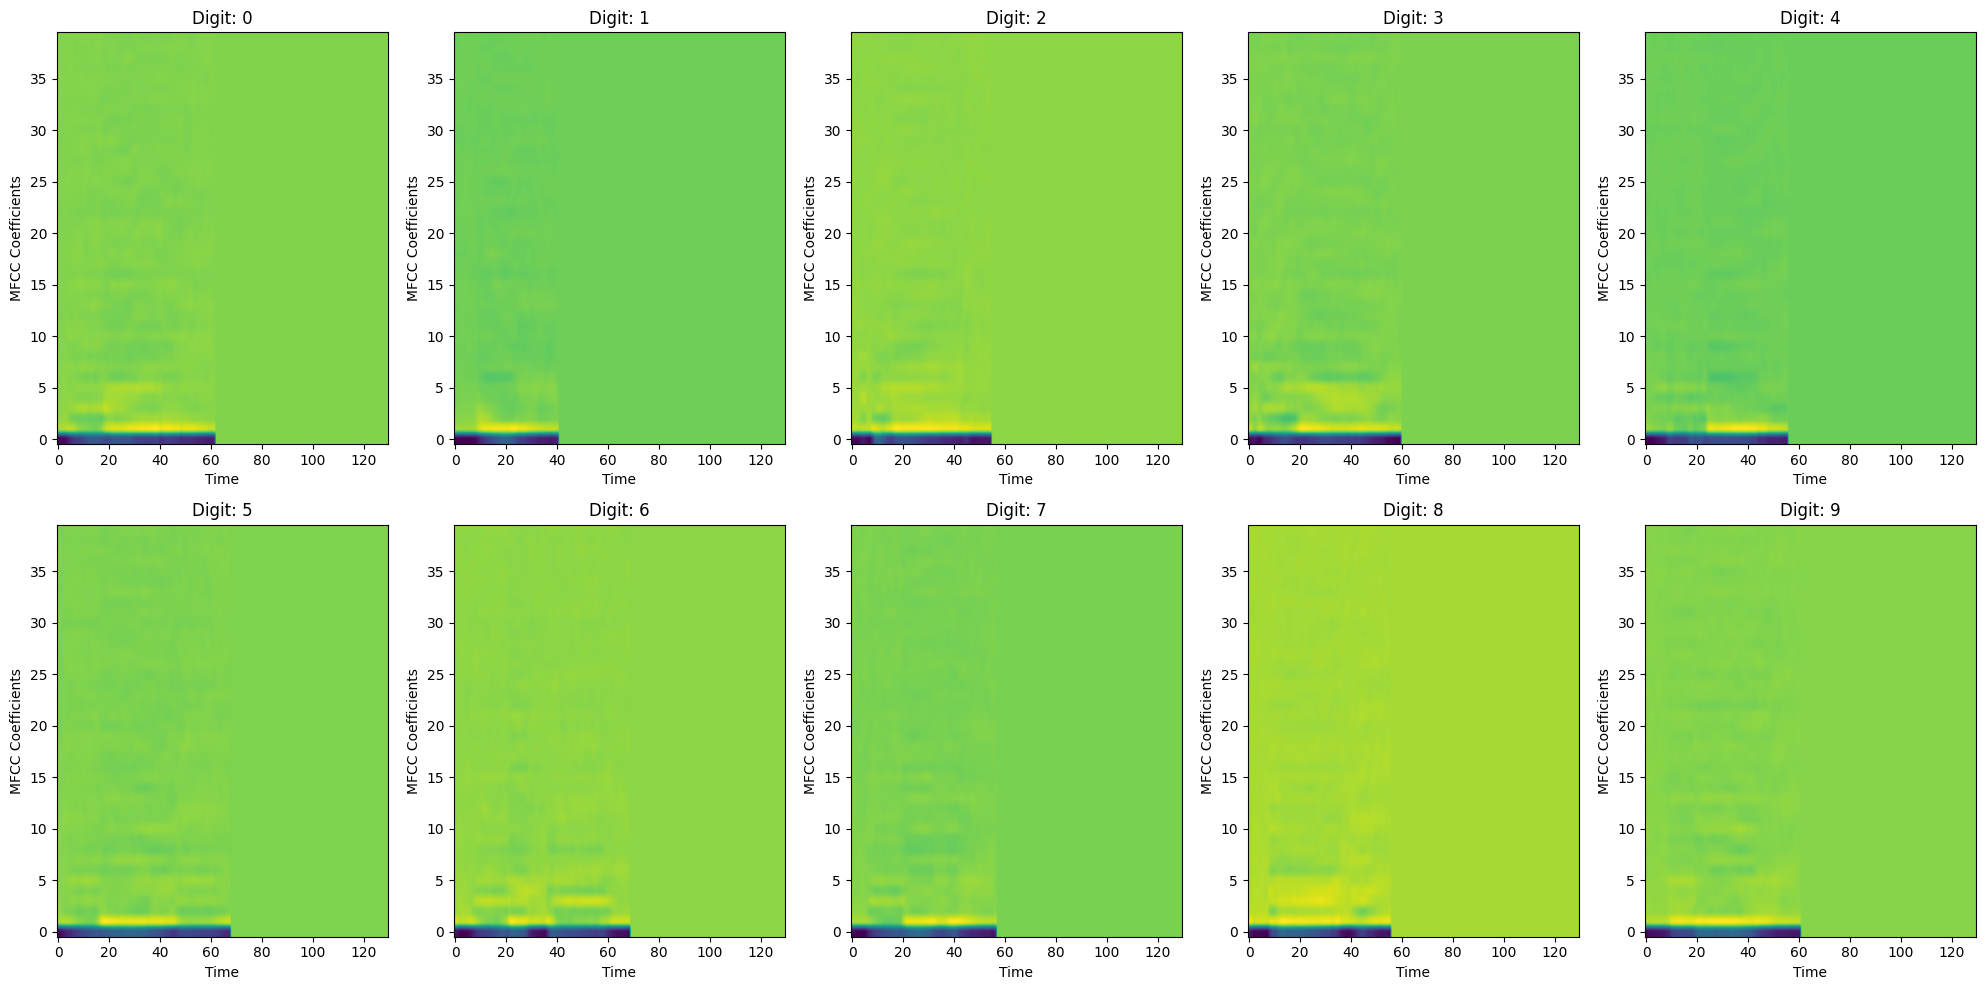

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('/kaggle/working/mfcc_40_dataset.npz')
X = data['X']
y = data['y']

plt.figure(figsize=(20, 10))
for digit in range(10):
    idx = np.where(y == digit)[0][0]
    mfcc = X[idx]

    plt.subplot(2, 5, digit + 1)
    plt.imshow(mfcc, origin='lower', aspect='auto', cmap='viridis')
    plt.title(f"Digit: {digit}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")

plt.tight_layout()
plt.show()


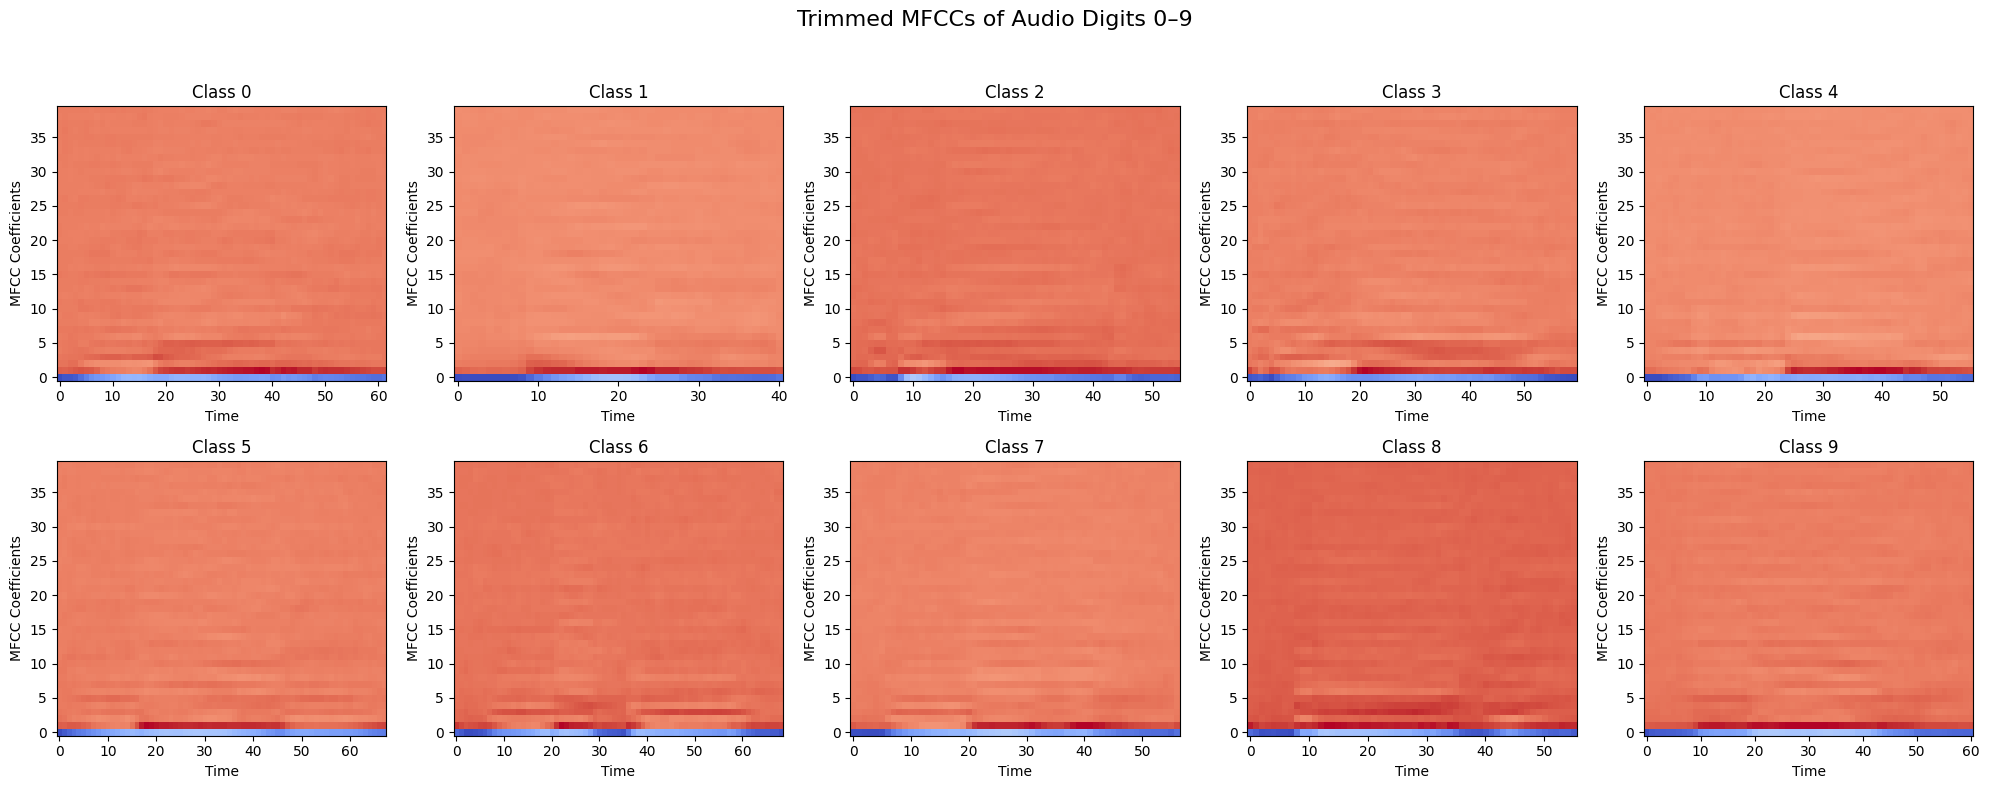

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('/kaggle/working/mfcc_40_dataset.npz')
X = data['X']
y = data['y']
def trim_mfcc(mfcc, threshold=1e-3):
    variances = np.var(mfcc, axis=0)
    cutoff = np.argmax(variances < threshold)
    if cutoff == 0: 
        cutoff = mfcc.shape[1]
    return mfcc[:, :cutoff]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Trimmed MFCCs of Audio Digits 0–9', fontsize=16)

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    idx = np.where(y == digit)[0][0] 
    mfcc = trim_mfcc(X[idx])
    
    ax.imshow(mfcc, origin='lower', aspect='auto', cmap='coolwarm')
    ax.set_title(f"Class {digit}")
    ax.set_xlabel("Time")
    ax.set_ylabel("MFCC Coefficients")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Model Building**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping

data = np.load("/kaggle/working/mfcc_40_dataset.npz")
X = data["X"]
y = data["y"]

X = X[..., np.newaxis] 

num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_cat, test_size=0.3, random_state=42, stratify=y
)

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(40, 130, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate = 0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    #callbacks=[early_stop],
    verbose=1
)

val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")

model.save("/kaggle/working/cnn_mfcc_model_40.keras", save_format='keras')
print("Model saved as cnn_mfcc_model_40.keras")


2025-05-08 13:43:56.934918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746711837.200223      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746711837.278777      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746711851.946893      31 gpu_device.cc:2022] Created device /job:localhost/repl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 40, 130, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 130, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 65, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20, 65, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 16, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 16, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 16, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 16, 512)          │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,653,642 (13.94 MB)

 Trainable params: 3,651,722 (13.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/100


I0000 00:00:1746711859.720323     122 service.cc:148] XLA service 0x7fd22c0091c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746711859.721131     122 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746711859.721150     122 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746711860.285739     122 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/657 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.1516 - loss: 6.3369 

I0000 00:00:1746711867.984785     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.1455 - loss: 3.9325 - val_accuracy: 0.2742 - val_loss: 2.0353
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2390 - loss: 2.1319 - val_accuracy: 0.3564 - val_loss: 1.7086
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3788 - loss: 1.7337 - val_accuracy: 0.5498 - val_loss: 1.2756
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5347 - loss: 1.2923 - val_accuracy: 0.6944 - val_loss: 0.9095
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6590 - loss: 0.9616 - val_accuracy: 0.7778 - val_loss: 0.6599
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7540 - loss: 0.7139 - val_accuracy: 0.8390 - val_loss: 0.4826
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8037 - loss: 0.5584 - val_accuracy: 0.8577 - val_loss: 0.4107
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8463 - loss: 0.4484 - val_

In [13]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")


Validation Accuracy: 0.9963, Loss: 0.0127


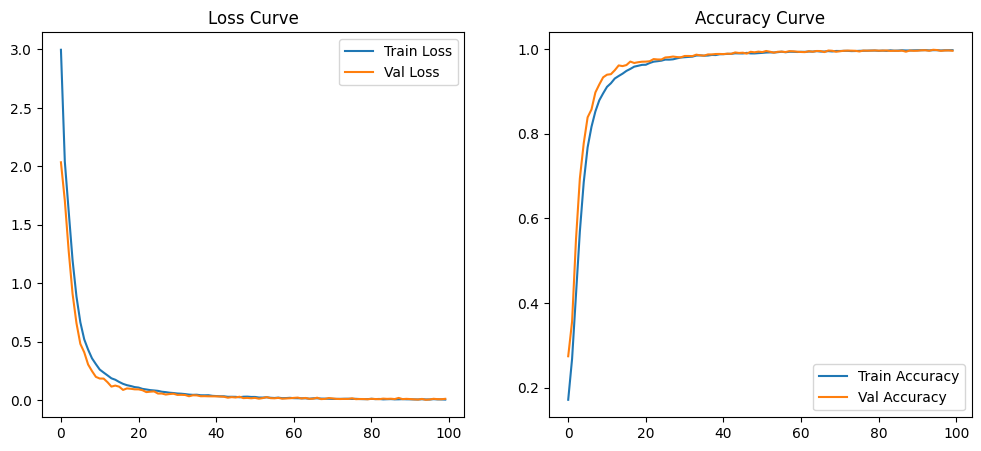

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()


282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


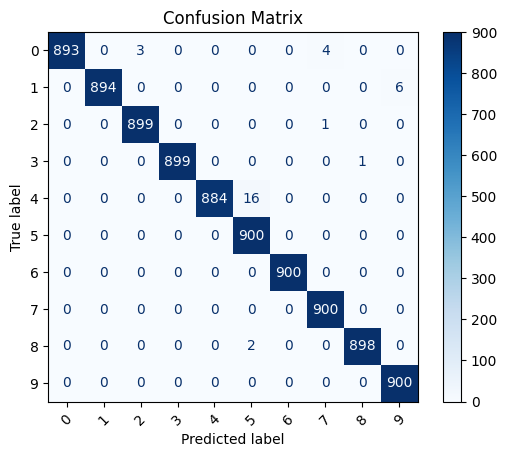

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()